<a href="https://colab.research.google.com/github/TaimaElkabli/Project-1/blob/main/Machine_Learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ML Workshop: Breast Cancer Dataset**


## **1. Load the Dataset**

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# 1. Load the data
data_bunch = load_breast_cancer()

# 2. Create the DataFrame using the feature data and feature names
df = pd.DataFrame(
    data=data_bunch.data,
    columns=data_bunch.feature_names
)

# 3. Add the target variable (Malignant/Benign)
# The target array contains 0 (Malignant) and 1 (Benign).
df['target'] = data_bunch.target

In [ ]:
# Select all columns except the 'target' column.
X = df.drop('target', axis=1).values
# Select only the 'target' column.
y = df['target'].values

## **3. Explore the Data (EDA)**

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## **4.Target Distribution**

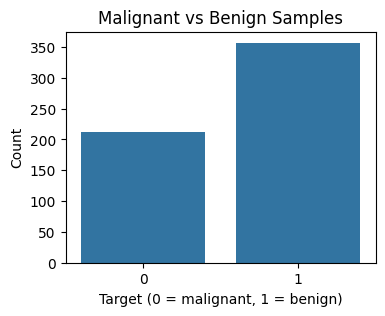

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,3))
sns.countplot(x=y)
plt.title("Malignant vs Benign Samples")
plt.xlabel("Target (0 = malignant, 1 = benign)")
plt.ylabel("Count")
plt.show()


##**5.Descriptive Statistics of Features**

In [ ]:
df.describe().T   # .T for cleaner view


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## **6. Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
# stratify=y ensures the training and test sets have the same class distribution as the original data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((455, 30), (114, 30))

## **7. Scale the Features**

In [ ]:
scaler = StandardScaler()

# Fit ONLY on training data
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X.columns,
    index=X_train.index
)

# Transform test data
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X.columns,
    index=X_test.index
)


## **8. Sanity Check After Scaling**

In [ ]:
X_train_scaled.describe().T


,count,mean,std,min,25%,50%,75%,max
mean radius,455.0,-2.928061e-16,1.001101,-2.027220,-0.695806,-0.228066,0.478550,4.017353
mean texture,455.0,6.246530e-16,1.001101,-2.167362,-0.737962,-0.097118,0.559633,4.552410
mean perimeter,455.0,-1.629954e-16,1.001101,-1.980187,-0.697991,-0.231210,0.503368,4.018733
mean area,455.0,-1.717796e-16,1.001101,-1.465734,-0.675898,-0.309785,0.352644,5.370416
mean smoothness,455.0,6.246530e-17,1.001101,-2.503730,-0.721006,-0.037747,0.645884,3.610271
mean compactness,455.0,-2.088683e-16,1.001101,-1.580330,-0.750408,-0.241269,0.490642,4.517740
mean concavity,455.0,-1.561632e-17,1.001101,-1.092292,-0.749272,-0.357634,0.526674,4.134445
mean concave points,455.0,6.636938e-17,1.001101,-1.243358,-0.723320,-0.404147,0.655219,3.931305
mean symmetry,455.0,-2.928061e-16,1.001101,-2.660791,-0.672812,-0.089790,0.523542,4.399657
mean fractal dimension,455.0,8.735381e-16,1.001101,-1.798182,-0.717996,-0.192935,0.479647,4.840942
